In [1]:
from functools import partial
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def make_visualization(func, start, minimum, section=np.linspace(1, 30, 100)):
    plt.plot(section, np.vectorize(func)(section))
    if start:
        plt.scatter(start, func(start), c='r')
    plt.scatter(minimum, func(minimum), c='g')
    
    
def optimize_stats(stats):
    print(stats)
    
def epoch(func, minimizer, start=None):
    minimum = minimizer(func)
    optimize_stats(minimum)
    make_visualization(func, start, minimum['x'])

In [3]:
def test_func_1(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def test_func_2(x):
    x = int(x)
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])


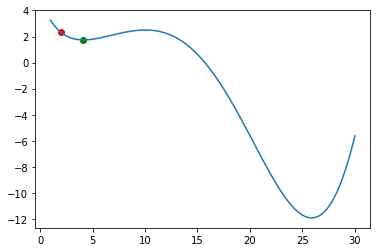

In [4]:
epoch(test_func_1, partial(sc.optimize.minimize, x0=2, method='BFGS'), 2)

      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])


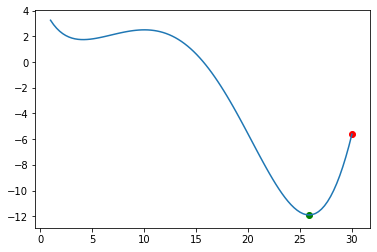

In [5]:
epoch(test_func_1, partial(sc.optimize.minimize, x0=30, method='BFGS'), 30)

     fun: array([-11.89889467])
     jac: array([5.32907052e-07])
 message: 'Optimization terminated successfully.'
    nfev: 66
     nit: 3
 success: True
       x: array([25.88019375])


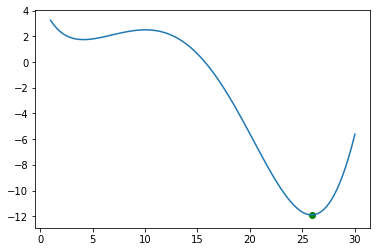

In [6]:
epoch(test_func_1, partial(sc.optimize.differential_evolution, bounds=[(1, 30)]))

      fun: -5.6122087764738
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])


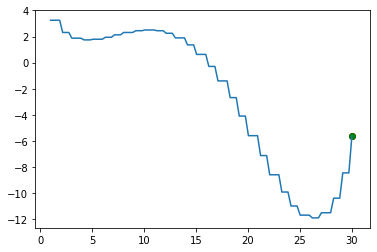

In [8]:
epoch(test_func_2, partial(sc.optimize.minimize, x0=30, method='BFGS'), 30)

     fun: -11.894590748771716
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([26.96733582])


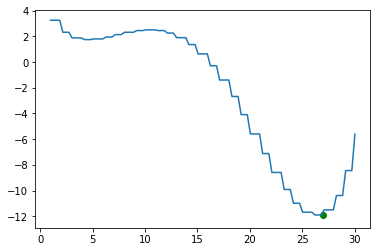

In [7]:
epoch(test_func_2, partial(sc.optimize.differential_evolution, bounds=[(1, 30)]))